In [ ]:
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import datetime

In [ ]:
automobile_df = pd.read_csv('auto-mpg.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
274,20.3,5,131.0,103,2830,15.9,78,2,audi 5000
169,20.0,6,232.0,100,2914,16.0,75,1,amc gremlin
182,28.0,4,107.0,86,2464,15.5,76,2,fiat 131
55,27.0,4,97.0,60,1834,19.0,71,2,volkswagen model 111
223,15.5,8,318.0,145,4140,13.7,77,1,dodge monaco brougham


In [ ]:
automobile_df.shape

(398, 9)

In [ ]:
automobile_df = automobile_df.replace('?',np.nan)

In [ ]:
automobile_df = automobile_df.dropna()

In [ ]:
automobile_df.shape

(392, 9)

In [ ]:
automobile_df.drop(['origin','car name'], axis = 1, inplace = True)

In [ ]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
306,28.8,6,173.0,115,2595,11.3,79
295,35.7,4,98.0,80,1915,14.4,79
378,38.0,4,105.0,63,2125,14.7,82
81,28.0,4,97.0,92,2288,17.0,72
357,32.9,4,119.0,100,2615,14.8,81


In [ ]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [ ]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
56,26.0,4,91.0,70,1955,20.5,1971
328,30.0,4,146.0,67,3250,21.8,1980
168,23.0,4,140.0,83,2639,17.0,1975
223,15.5,8,318.0,145,4140,13.7,1977
200,18.0,6,250.0,78,3574,21.0,1976


In [ ]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [ ]:
automobile_df.drop(['model year'], axis = 1, inplace = True)

In [ ]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
282,22.3,4,140.0,88,2890,17.3,42
272,23.8,4,151.0,85,2855,17.6,43
40,14.0,8,351.0,153,4154,13.5,50
150,26.0,4,108.0,93,2391,15.5,47
154,15.0,6,250.0,72,3432,21.0,46


In [ ]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [ ]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors = 'coerce')
automobile_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,51
1,15.0,8,350.0,165,3693,11.5,51
2,18.0,8,318.0,150,3436,11.0,51
3,16.0,8,304.0,150,3433,12.0,51
4,17.0,8,302.0,140,3449,10.5,51
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,39
394,44.0,4,97.0,52,2130,24.6,39
395,32.0,4,135.0,84,2295,11.6,39
396,28.0,4,120.0,79,2625,18.6,39


In [ ]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,45.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,42.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,45.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [ ]:
#fig, ax = plt.subplots(figsize=(12,8))

#plt.scatter(automobile_df['age'], automobile_df

In [ ]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


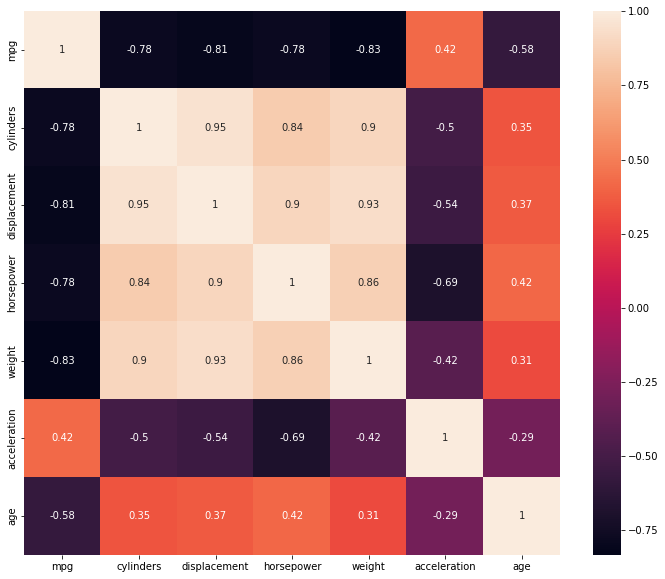

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

sns.heatmap(automobile_corr, annot = True)

In [ ]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,16.0,8,400.0,230,4278,9.5,48
1,22.0,4,121.0,76,2511,18.0,49
2,32.4,4,108.0,75,2350,16.8,40
3,23.0,4,120.0,97,2506,14.5,49
4,26.0,4,97.0,46,1950,21.0,48


In [ ]:
automobile_df.to_csv('auto-mpg-processed.csv', index = False)

In [ ]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]

Y = automobile_df['mpg']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
x_train.sample(5)

,horsepower
46,90
59,97
355,52
75,142
311,180


In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize = True).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
print ("Training Score: ", linear_model.score(x_train, y_train))

Training Score:  0.6198005066058698


In [ ]:
y_pred = linear_model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

print("Testing Score: ", r2_score(y_test, y_pred))

Testing Score:  0.5170231488384489


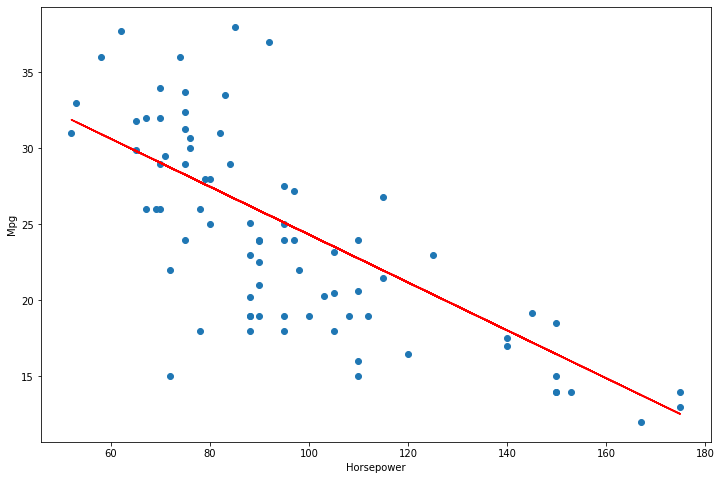

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()